In [397]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [398]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [399]:
train_data=pd.read_excel('A:\\flight_price ml\\dataset\\Data_Train.xlsx')

In [400]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [401]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [402]:
train_data.dropna(inplace=True)

In [403]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [404]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [405]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [406]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [407]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [408]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [409]:
train_data['journey_day']=train_data['Date_of_Journey'].dt.day
train_data['journey_month']=train_data['Date_of_Journey'].dt.month

In [410]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-04-02 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-02 05:50:00,2022-04-02 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-02 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-04-02 18:05:00,2022-04-02 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-04-02 16:50:00,2022-04-02 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [411]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-04-02 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-02 05:50:00,2022-04-02 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-02 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-04-02 18:05:00,2022-04-02 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-04-02 16:50:00,2022-04-02 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [412]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [413]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-02 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-02 05:50:00,2022-04-02 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-02 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-02 18:05:00,2022-04-02 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-02 16:50:00,2022-04-02 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [414]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    
def extract_minute(df,col):
    df[col+'_minute']=df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [415]:
extract_hour(train_data,'Dep_Time')
extract_minute(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [416]:
extract_hour(train_data,'Arrival_Time')
extract_minute(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')


In [417]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [418]:
duration=list(train_data['Duration'])

In [419]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [420]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if "h" in duration[i]:
            duration[i]=duration[i]+ " 0m"
        else:
            duration[i]="0h "+ duration[i]

In [421]:
train_data['Duration']=duration

In [422]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [423]:
def hour(x):
    return x.split(' ')[0][0:-1]
    
def minute(x):
    return x.split(' ')[1][0:-1]

In [424]:
train_data['Duration_hour']=train_data['Duration'].apply(hour)
train_data['Duration_minute']=train_data['Duration'].apply(minute)

In [425]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [426]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_minute        object
dtype: object

In [427]:
train_data['Duration_hour']=train_data['Duration_hour'].astype(int)
train_data['Duration_minute']=train_data['Duration_minute'].astype(int)


In [428]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int32
Duration_minute         int32
dtype: object

In [429]:
cat_col=[ col for col in train_data.columns if train_data[col].dtype=="O"]
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [430]:
cont_col=[ col for col in train_data.columns if train_data[col].dtype!="O"]
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute']

In [431]:
categorical=train_data[cat_col]

In [432]:
categorical.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info


In [433]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

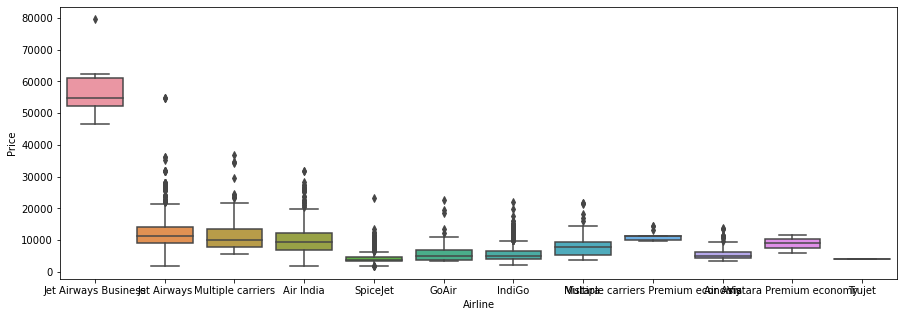

In [434]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

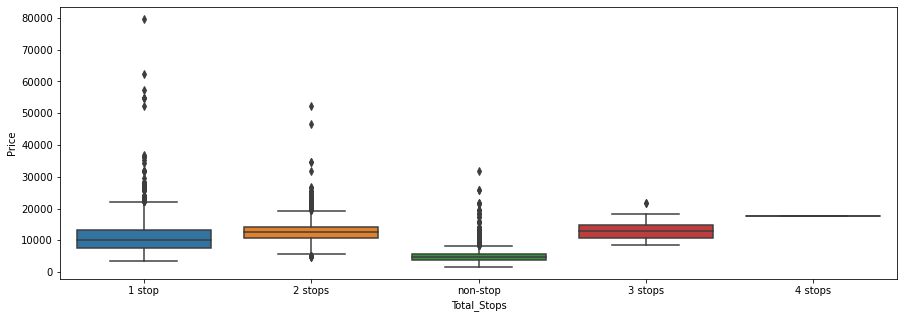

In [479]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))

In [435]:
airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [436]:
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Source', ylabel='Price'>

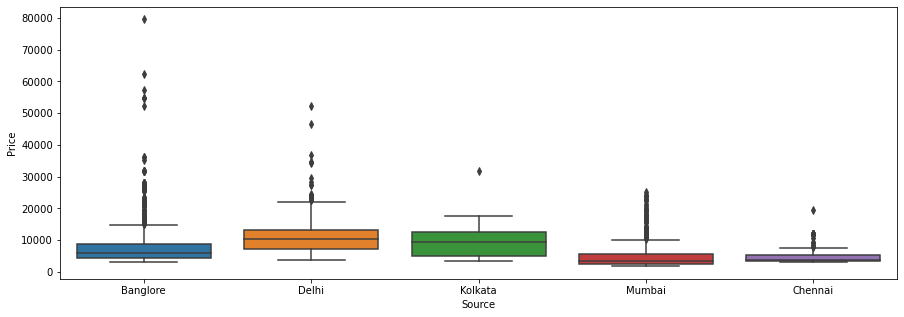

In [437]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [438]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [439]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

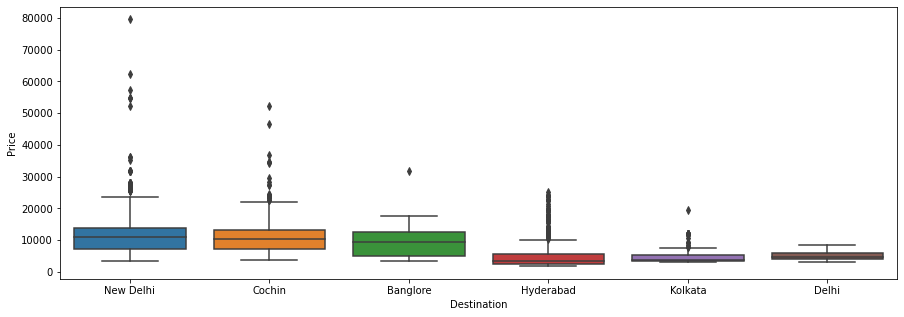

In [440]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [441]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [442]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [443]:
categorical.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [444]:
drop_column(categorical,'Route')

In [445]:
categorical.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [446]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Duration               0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [447]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [448]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

In [449]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [450]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Duration has total 368 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [451]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [452]:
categorical.columns


Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [453]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [454]:
categorical.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,0,34,8,13,5


In [455]:
drop_column(categorical,'Additional_Info')

In [456]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [457]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [458]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [478]:
categorical.head()

,Airline,Source,Destination,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,7h 25m,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,19h 0m,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,5h 25m,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,0,34,8,13,5


In [460]:
data_train=pd.concat([categorical.Airline,Source,Destination,train_data[cont_col]],axis=1)

In [461]:
data_train.head()

,Airline,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [462]:
drop_column(data_train,'Airline')

In [463]:
data_train.head()

,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [464]:
pd.set_option('Display.max_columns',35)

In [465]:
data_train.head()

,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [466]:
data_train.shape

(10682, 18)

In [467]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

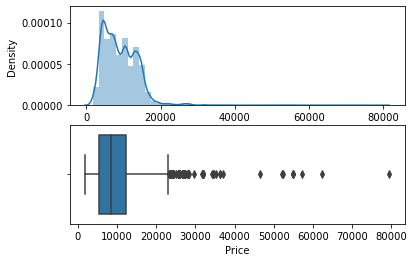

In [468]:
plot(data_train,'Price')

In [469]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

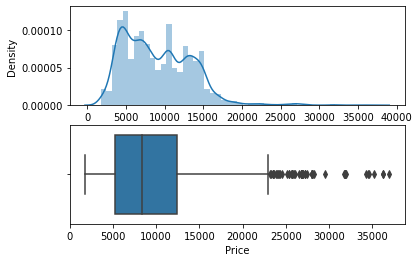

In [470]:
plot(data_train,'Price')

In [471]:
x=data_train.drop('Price',axis=1)
x.head()

,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [472]:
x.shape

(10682, 17)

In [473]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [474]:
from sklearn.feature_selection import mutual_info_classif

In [475]:
mutual_info_classif(x,y)

array([0.16468311, 1.554764  , 0.87366852, 0.29766019, 1.53763482,
       0.40255878, 0.2807646 , 0.17203379, 0.37534479, 1.12008824,
       0.83804917, 1.42201444, 1.20565323, 1.87127149, 1.54080634,
       1.77285658, 1.05167358])

In [476]:
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp

,0
Chennai,0.169763
Delhi,1.541042
Kolkata,0.869736
Mumbai,0.287860
Cochin,1.539497
Delhi,0.405977
Hyderabad,0.281286
Kolkata,0.163413
New Delhi,0.387722
journey_day,1.089083


In [477]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Arrival_Time_hour,1.847908
Duration_hour,1.780485
Arrival_Time_minute,1.548672
Delhi,1.541042
Cochin,1.539497
Dep_Time_hour,1.444808
Dep_Time_minute,1.218836
journey_day,1.089083
Duration_minute,1.085290
Kolkata,0.869736


In [480]:
from sklearn.model_selection import train_test_split

In [481]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [493]:
from sklearn import metrics
import pickle

In [498]:
def predict(ml_model,dump):
    model=ml_model.fit(x_train,y_train)
    print('training score: {}'.format(model.score(x_train,y_train)))
    y_prediction=model.predict(x_test)
    print('prediction are: {}'.format(y_prediction))
    print('\n')
    
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score is: {}'.format(r2_score))
    
    print('MAE :', metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.displot(y_test-y_prediction)
    
    if dump==1:
        file=open('A:\flight_price ml\dataset/model.pkl')
        pickle.dump(model,file)
    

In [503]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

training score: 0.9366240570812818
prediction are: [18150.97766667  6238.76166667  6447.37       ...  2675.87
 12826.67397619  4961.46666667]


r2 score is: 0.7647668220938895
MAE : 1359.2217170752608
MSE: 4491732.398098349
RMSE: 2119.3707552239057


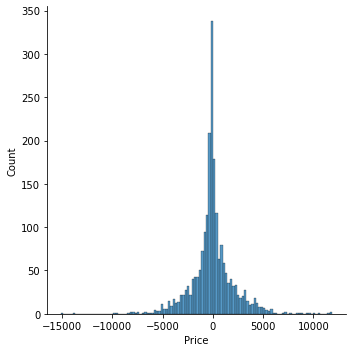

In [502]:
predict(RandomForestRegressor(),0)

training score: 0.9555249102325788
prediction are: [18916.          6496.          6386.         ...  2050.
 12389.33333333  4823.        ]


r2 score is: 0.627753180420898
MAE : 1577.1648494774606
MSE: 7107981.597136303
RMSE: 2666.0798182230596


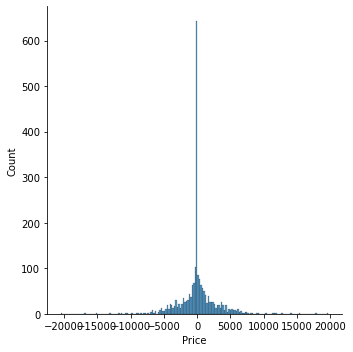

In [504]:
predict(DecisionTreeRegressor(),0)

training score: 0.3999865881272223
prediction are: [10005.86666329  7686.27938049  8860.90008826 ...  5540.61315136
 10935.6294716   4375.64484907]


r2 score is: 0.4317783589525488
MAE : 2527.1598355026385
MSE: 10850083.211527908
RMSE: 3293.9464494019794


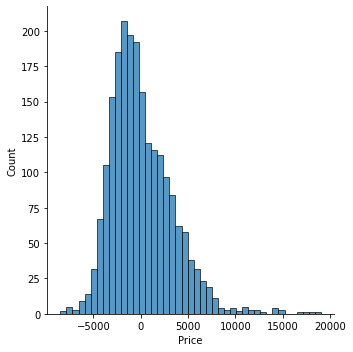

In [505]:
predict(LinearRegression(),0)

training score: 0.7323966116458549
prediction are: [12710.2  7449.8  6218.2 ...  5815.2 11924.4  5944.8]


r2 score is: 0.5997893988411702
MAE : 1885.2823584464202
MSE: 7641944.641010763
RMSE: 2764.4067430482733


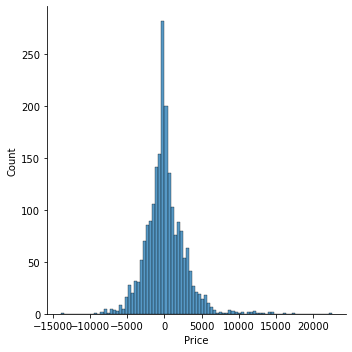

In [506]:
predict(KNeighborsRegressor(),0)

In [508]:
from sklearn.model_selection import RandomizedSearchCV

In [509]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=4)]
min_samples_split=[5,10,15,100]

In [510]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [511]:
reg_rf=RandomForestRegressor()

In [512]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [514]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [515]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

In [516]:
prediction=rf_random.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

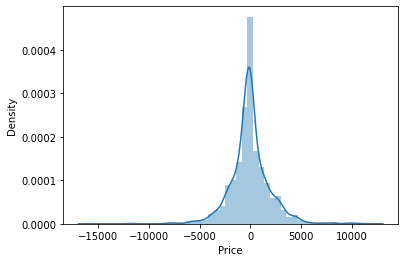

In [517]:
sns.distplot(y_test-prediction)

In [518]:
metrics.r2_score(y_test,prediction)

0.7986094395279872